# Table of Contents
1. [Introduction](#section-one)
    - [Problem Statement](#subsection-one)
    
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
https://archive.ics.uci.edu/ml/datasets/bank+marketing
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

Attribute Information:

Input variables:<br>
bank client data:<br>
Numeric Attributes:<br>
1 - age <br>
2 - duration: last contact duration, in seconds.<br>
3 - campaign: number of contacts performed during this campaign and for this client.<br>
4 - pdays: number of days that passed by after the client was last contacted from a previous campaign<br>
5 - previous: number of contacts performed before this campaign and for this client <br>
<b>social and economic context attributes</b><br>
6 - emp.var.rate: employment variation rate - quarterly indicator <br>
7 - cons.price.idx: consumer price index - monthly indicator <br>
8 - cons.conf.idx: consumer confidence index - monthly indicator <br>
9 - euribor3m: euribor 3 month rate - daily indicator <br>
10 - nr.employed: number of employees - quarterly indicator <br>

Categorical Attributes:<br>
1 - job : type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
2 - marital : marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
3 - education ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
4 - default: has credit in default? ('no','yes','unknown')<br>
5 - housing: has housing loan? ('no','yes','unknown')<br>
6 - loan: has personal loan? ('no','yes','unknown')<br>
related with the last contact of the current campaign:<br>
7 - contact: contact communication type ('cellular','telephone')<br>
8 - month: last contact month of year ('jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
9 - day_of_week: last contact day of the week ('mon','tue','wed','thu','fri')<br>
10 - poutcome: outcome of the previous marketing campaign ('failure','nonexistent','success')<br>




# Data Wrangling

## Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

# Data Cleaning

In [2]:

bank_data = pd.read_csv(os.getcwd()+'\\bank-additional-full.csv',sep=';')
#Encoding 999 in pdays as 0 Encoding 999 in pdays feature( i.e clients who haven't been contacted for the previous campaign) into 0
bank_duration_encoded = bank_data.copy()
bank_duration_encoded.loc[bank_duration_encoded['pdays'] == 999, 'pdays'] = 0

#Drop Duplicate rows
bank_duration_encoded.drop_duplicates(subset=None, keep='first', inplace=True)

In [3]:
#profile = ProfileReport(df, title="Pandas Profiling Report",explorative=True)
#profile.to_notebook_iframe()
#profile.to_file('initial_report.html')

# Exploratory Data Analysis

In [66]:
job_vs_duration = px.box(bank_duration_encoded, x="duration", y="job", color="y",notched=True,template='simple_white',color_discrete_sequence=px.colors.qualitative.Pastel)
job_vs_duration.update_traces(quartilemethod="exclusive",orientation='h') #Quantile at 2.5 and 7.5
job_vs_duration.show()

<a class="anchor" id="first-bullet"></a>

In [69]:
#Campaign vs duration calls
campaign_vs_duration = px.scatter(bank_duration_encoded, x="campaign", y="duration",color='y',template='simple_white',color_discrete_sequence=px.colors.qualitative.Pastel)
campaign_vs_duration.show()

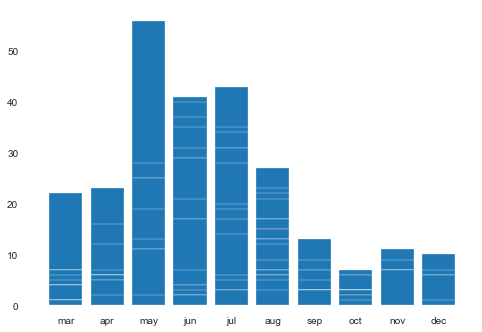

In [7]:
#campaign vs month
campaign_vs_month = bank_duration_encoded.copy()
sort_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
campaign_vs_month.month = campaign_vs_month.month.astype("category")
campaign_vs_month.month.cat.set_categories(sort_order, inplace=True)
campaign_vs_month = campaign_vs_month.sort_values(['month'])
plt.bar(campaign_vs_month['month'],campaign_vs_month['campaign'])
plt.show()

Insights:
    Campaign activity is high during May and slowly decays by the  end of the year. March and Apirl sees almost half the activity in may.
    

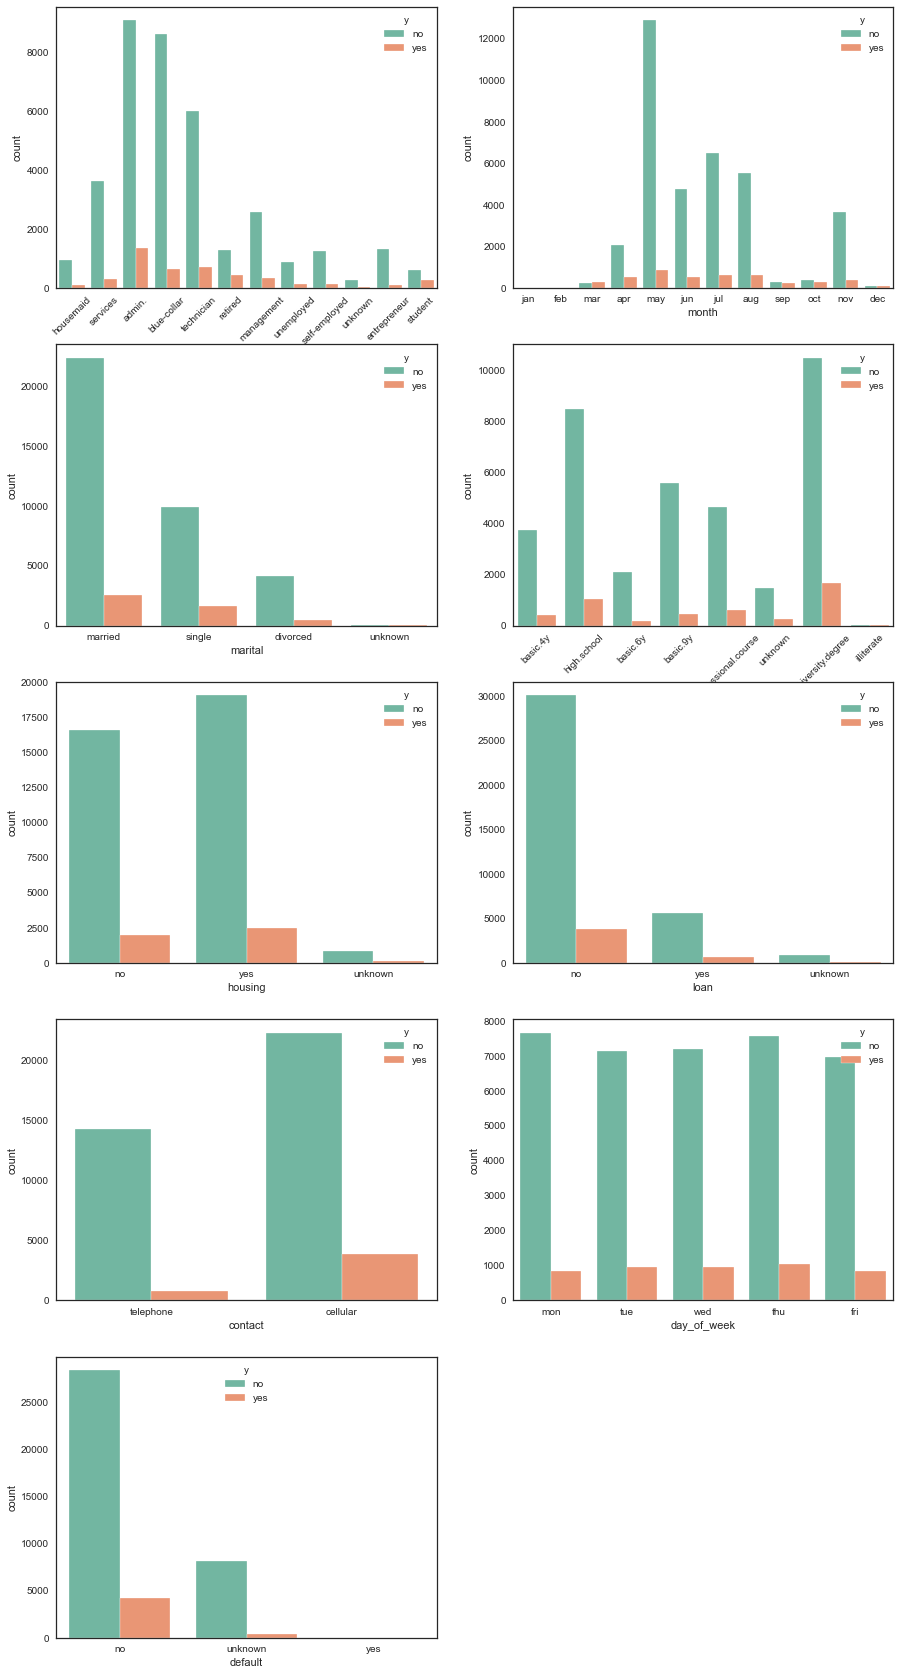

In [21]:
#Yes and No vs (Job, Month, Marital status, Education, Day of week, Housing, Contact, default)

plt.figure(figsize = (15, 30))
sx = plt.subplot(5,2,1)
sns.countplot(x="job",hue="y", data=bank_duration_encoded, palette="Set2")
sx.set_xticklabels(sx.get_xticklabels(),rotation=45)
sx = plt.subplot(5,2,2)

bde_copy = bank_duration_encoded.copy()
bde_copy.month = bde_copy.month.astype("category")
bde_copy.month.cat.set_categories(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], inplace=True)

sns.countplot(x="month",hue="y", data=bde_copy.sort_values(['month']), palette="Set2")
sx = plt.subplot(5,2,3)
sns.countplot(x="marital",hue="y", data=bank_duration_encoded, palette="Set2")
sx = plt.subplot(5,2,4)
sns.countplot(x="education",hue="y", data=bank_duration_encoded, palette="Set2")
sx.set_xticklabels(sx.get_xticklabels(),rotation=45)
sx = plt.subplot(5,2,5)
sns.countplot(x="housing",hue="y", data=bank_duration_encoded, palette="Set2")
sx = plt.subplot(5,2,6)
sns.countplot(x="loan",hue="y", data=bank_duration_encoded, palette="Set2")
sx = plt.subplot(5,2,7)
sns.countplot(x="contact",hue="y", data=bank_duration_encoded, palette="Set2")
sx = plt.subplot(5,2,8)
sns.countplot(x="day_of_week",hue="y", data=bank_duration_encoded, palette="Set2")
sx = plt.subplot(5,2,9)
sns.countplot(x="default",hue="y", data=bank_duration_encoded, palette="Set2")

Insights:<br>
1. May, June, July, August & November where the months the campaigns were actively performed.<br>
2. Admins, Technitions and people with jobs in services, management and blue-collar jobs were targeted for the campaigns.<br>
3. Married and single people are more likely to deposit. <br>
4. People with high-school, professional course or university degree are more likely to deposit. <br>
5. Loan, housing, contact, day of the week, default don't really contribute much to drawing any conclusions. <br>

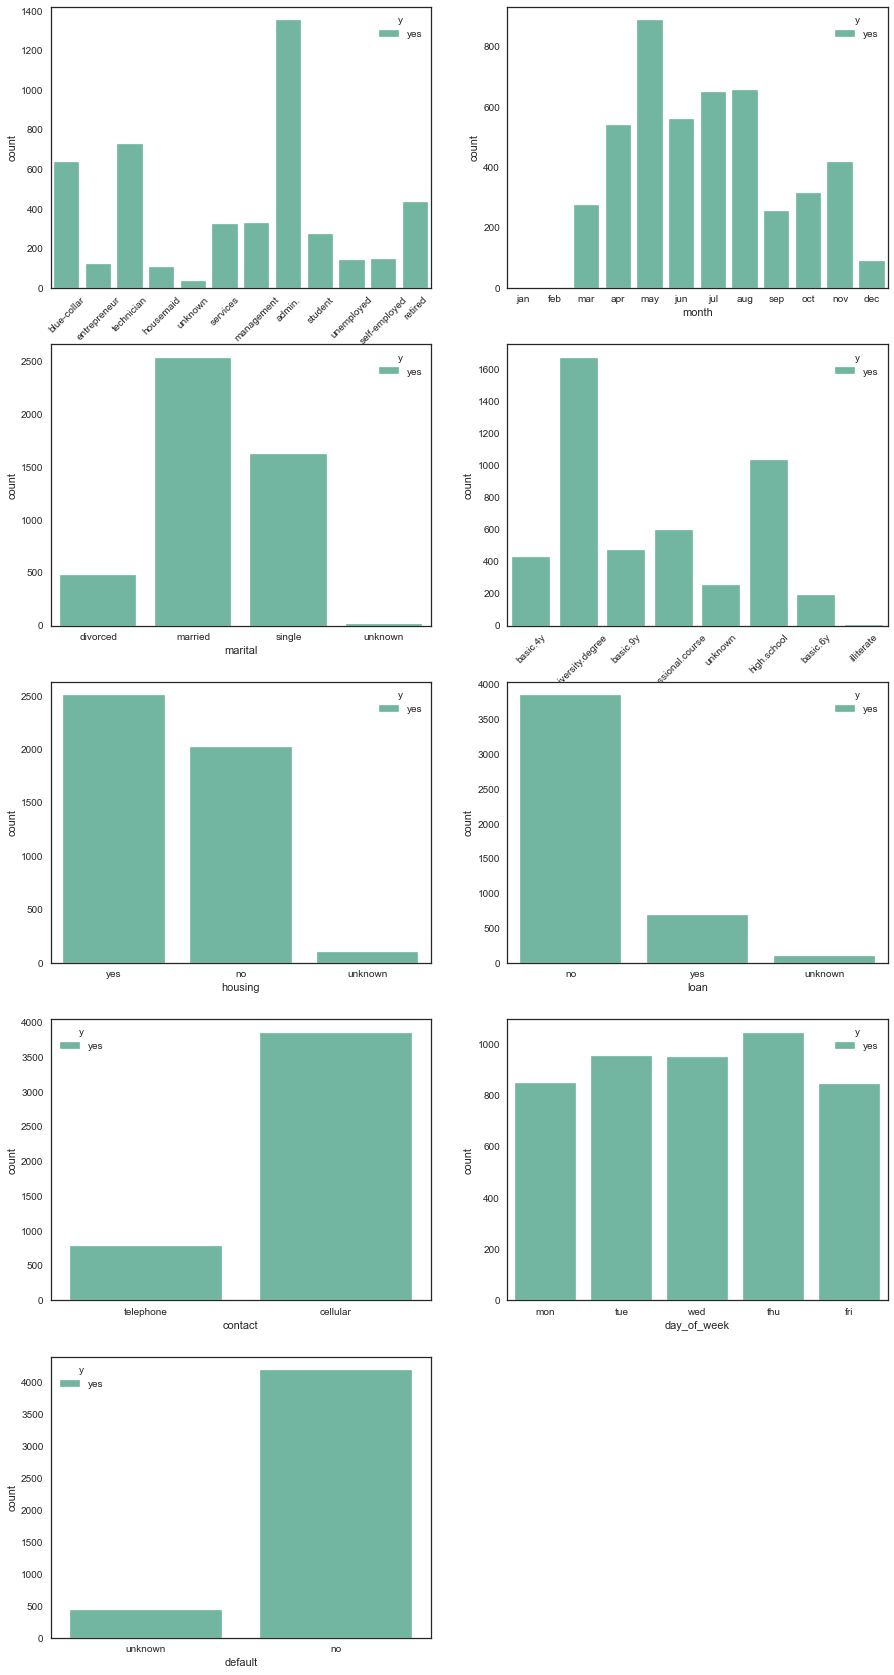

In [22]:
# Only - Yes vs (Job, Month, Marital status, Education, Day of week, Housing, Contact, default)

plt.figure(figsize = (15, 30))
bank_only_yes = bank_duration_encoded.copy()
bank_only_yes = bank_only_yes[bank_only_yes['y']=='yes']
sx2 = plt.subplot(5,2,1)
sns.countplot(x="job",hue="y", data=bank_only_yes, palette="Set2")
sx2.set_xticklabels(sx2.get_xticklabels(),rotation=45)
sx2 = plt.subplot(5,2,2)

bde_only_yes_copy = bank_only_yes.copy()
bde_only_yes_copy.month = bde_copy.month.astype("category")
bde_only_yes_copy.month.cat.set_categories(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], inplace=True)

sns.countplot(x="month",hue="y", data=bde_only_yes_copy.sort_values(['month']), palette="Set2")
sx2 = plt.subplot(5,2,3)
sns.countplot(x="marital",hue="y", data=bank_only_yes, palette="Set2")
sx2 = plt.subplot(5,2,4)
sns.countplot(x="education",hue="y", data=bank_only_yes, palette="Set2")
sx2.set_xticklabels(sx2.get_xticklabels(),rotation=45)
sx2 = plt.subplot(5,2,5)
sns.countplot(x="housing",hue="y", data=bank_only_yes, palette="Set2")
sx2 = plt.subplot(5,2,6)
sns.countplot(x="loan",hue="y", data=bank_only_yes, palette="Set2")
sx2 = plt.subplot(5,2,7)
sns.countplot(x="contact",hue="y", data=bank_only_yes, palette="Set2")
sx2 = plt.subplot(5,2,8)
sns.countplot(x="day_of_week",hue="y", data=bank_only_yes, palette="Set2")
sx2 = plt.subplot(5,2,9)
sns.countplot(x="default",hue="y", data=bank_only_yes, palette="Set2")

#Insights : <br>
1. Retired people and people with blue-collar, technitian and admin jobs contribute to the majority of the deposits. <br>
2. April to August including November contributes to highest deposits. <br>
3. poeple without loans at the bank tend to have contributed more to the deposits. <br>
4. cellular contacts and people with no defaults are more favorable.<br>

In [ ]:
#Economic Data analysis

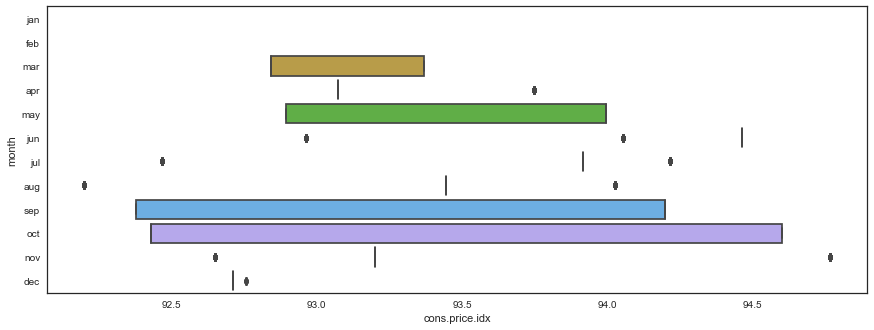

In [57]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(14.7, 5.27)
sns.boxplot(x='cons.price.idx',y='month',data=bde_copy,ax=ax)

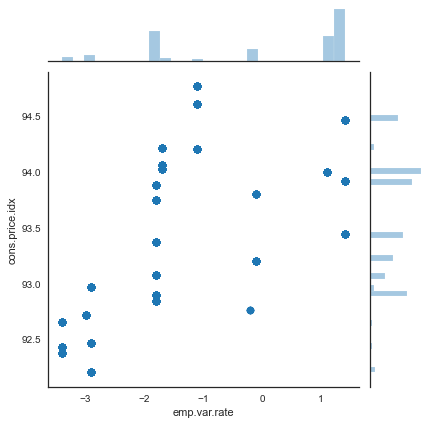

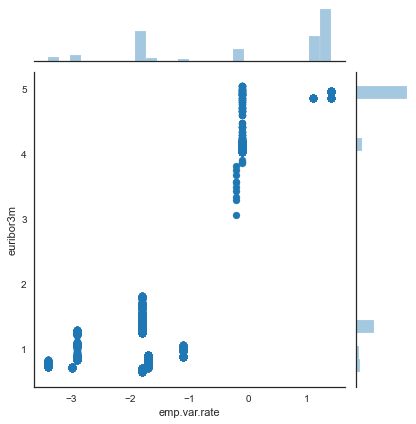

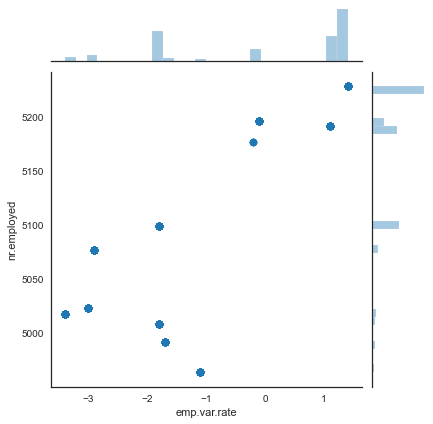

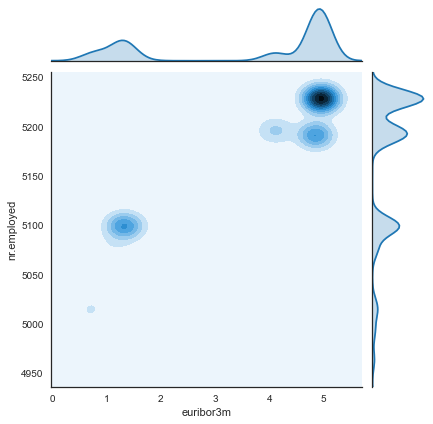

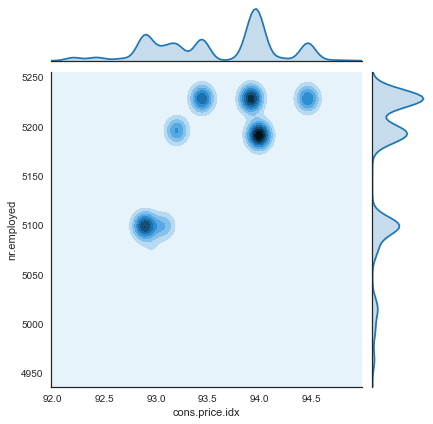

In [36]:
sns.jointplot(x ='emp.var.rate', y ='cons.price.idx', data = bank_duration_encoded) 
sns.jointplot(x ='emp.var.rate', y ='euribor3m', data = bank_duration_encoded) 
sns.jointplot(x ='emp.var.rate', y ='nr.employed', data = bank_duration_encoded) 
sns.jointplot(x ='euribor3m', y ='nr.employed', data = bank_duration_encoded, kind ='kde') 
sns.jointplot(x ='cons.price.idx', y ='nr.employed', data = bank_duration_encoded, kind ='kde') 

Insights:
1. As the euribor interest rates increased, employee variation rate also increased. Higher the euribor interest rates more number of people were employed.(More on https://www.global-rates.com/en/interest-rates/euribor/euribor-interest-3-months.aspx)<br>
2. More the number of people employed, higher the consumer price index.<br>
3. Jun, July and August had high employment rate.<br>
4. After the fluctuation in september and October, the employment reduced towards the end of the year. Explains the small increase in November and drop in December.<br>

# Feature Engineering

Text(0.5, 1.0, 'previous')

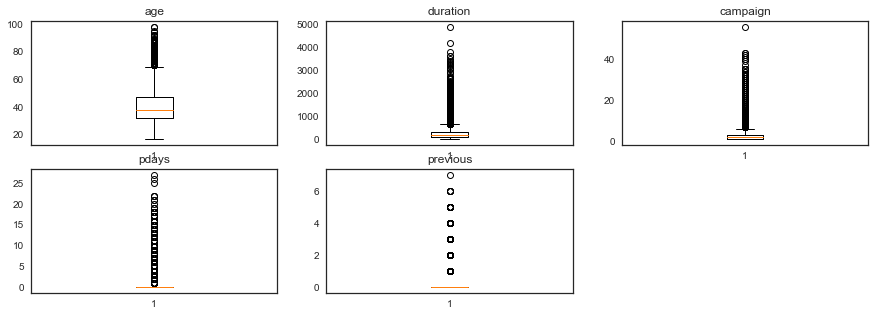

In [26]:
#Checking for outliers in data
plt.figure(figsize = (15, 5))
ax=plt.subplot(231)
plt.boxplot(bank_duration_encoded['age'])
ax.set_title('age')
ax=plt.subplot(232)
plt.boxplot(bank_duration_encoded['duration'])
ax.set_title('duration')
ax=plt.subplot(233)
plt.boxplot(bank_duration_encoded['campaign'])
ax.set_title('campaign')
ax=plt.subplot(234)
plt.boxplot(bank_duration_encoded['pdays'])
ax.set_title('pdays')
ax=plt.subplot(235)
plt.boxplot(bank_duration_encoded['previous'])
ax.set_title('previous')


In [10]:
#We can directly apply interquantile range filter for age, duration and campaign. But I want to be more considerate to pdays and previous.
# numerical_features=['age','campaign','duration']
# for cols in numerical_features:
#     Q1 = bank_duration_encoded[cols].quantile(0.25)
#     Q3 = bank_duration_encoded[cols].quantile(0.75)
#     IQR = Q3 - Q1     

#     filter = (bank_duration_encoded[cols] >= Q1 - 1.5 * IQR) & (bank_duration_encoded[cols] <= Q3 + 1.5 *IQR)
#     bank_duration_encoded=bank_duration_encoded.loc[filter]

In [11]:
# bank_outliers_handling = bank_duration_encoded.copy()
# bank_previous = bank_outliers_handling[bank_outliers_handling['previous'] != 0]
# bank_pdays = bank_outliers_handling[bank_outliers_handling['pdays'] != 0]
# plt.figure(figsize = (5, 5))

# ax2=plt.subplot(121)
# plt.boxplot(bank_previous['pdays'])
# ax2.set_title('pdays')

# ax2=plt.subplot(122)
# plt.boxplot(bank_pdays['previous'])
# ax2.set_title('previous')

In [12]:
# numerical_features_two=['pdays','previous']
# for cols in numerical_features:
#     Q1 = bank_duration_encoded[cols].quantile(0.25)
#     Q3 = bank_duration_encoded[cols].quantile(0.75)
#     IQR = Q3 - Q1     

#     filter = (bank_duration_encoded[cols] >= Q1 - 1.5 * IQR) & (bank_duration_encoded[cols] <= Q3 + 1.5 *IQR)
#     bank_duration_encoded[bank_duration_encoded[cols] !=0]=bank_duration_encoded[bank_duration_encoded[cols] !=0].loc[filter]

In [13]:
# #replotting after applying filter
# bank_outliers_handling2 = bank_duration_encoded.copy()
# bank_previous2 = bank_outliers_handling2[bank_outliers_handling2['previous'] != 0]
# bank_pdays2 = bank_outliers_handling2[bank_outliers_handling2['pdays'] != 0]
# plt.figure(figsize = (5, 5))

# ax3=plt.subplot(121)
# plt.boxplot(bank_previous2['pdays'])
# ax3.set_title('pdays')

# ax3=plt.subplot(122)
# plt.boxplot(bank_pdays2['previous'])
# ax3.set_title('previous')

We have reduced extreme outliers. But in the formula we are filtering lower values as well, need to confirm if it has to be done only on the higher outliers<br>
Should we apply interquantile range on both sides (upper and lower bound?) for campaign, duration & age as well ?


<a id="section-one"></a>

<a class="anchor" id="second-bullet"></a>